In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import set_config

In [2]:
datos = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos 1C-2025/Regresion/NN_house_price.csv')
datos = datos.drop(['Unnamed: 0'], axis=1)
datos.rename(columns={'banyos':'baños'},inplace=True)
datos

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


## Analisis exploratorio de los datos

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   baños               1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

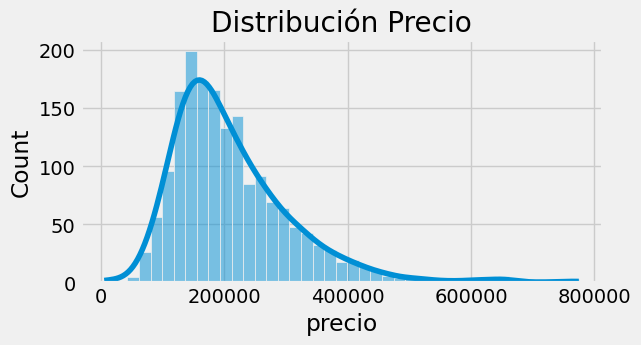

In [ ]:
# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='precio', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio');

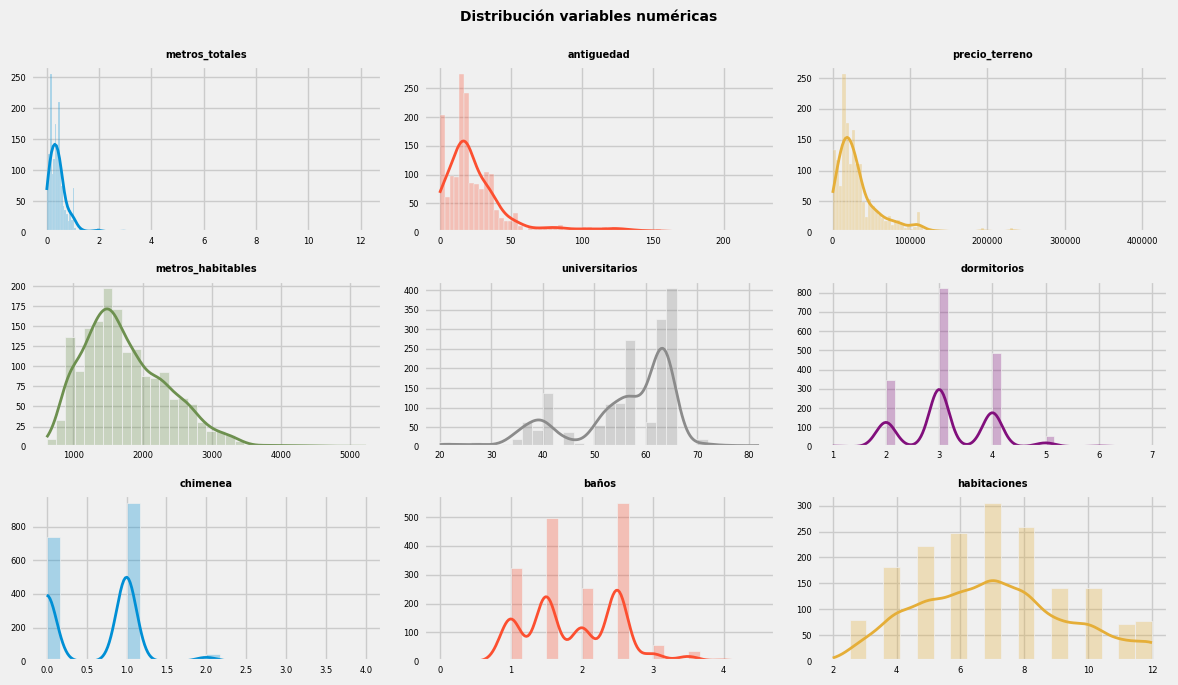

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [3]:
# Valores observados de chimenea
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")
datos.chimenea.value_counts()

dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'].map(dic_replace).fillna(datos['chimenea'])
datos.chimenea.value_counts().sort_index()

,count
chimenea,
0,740
1,942
2_mas,46


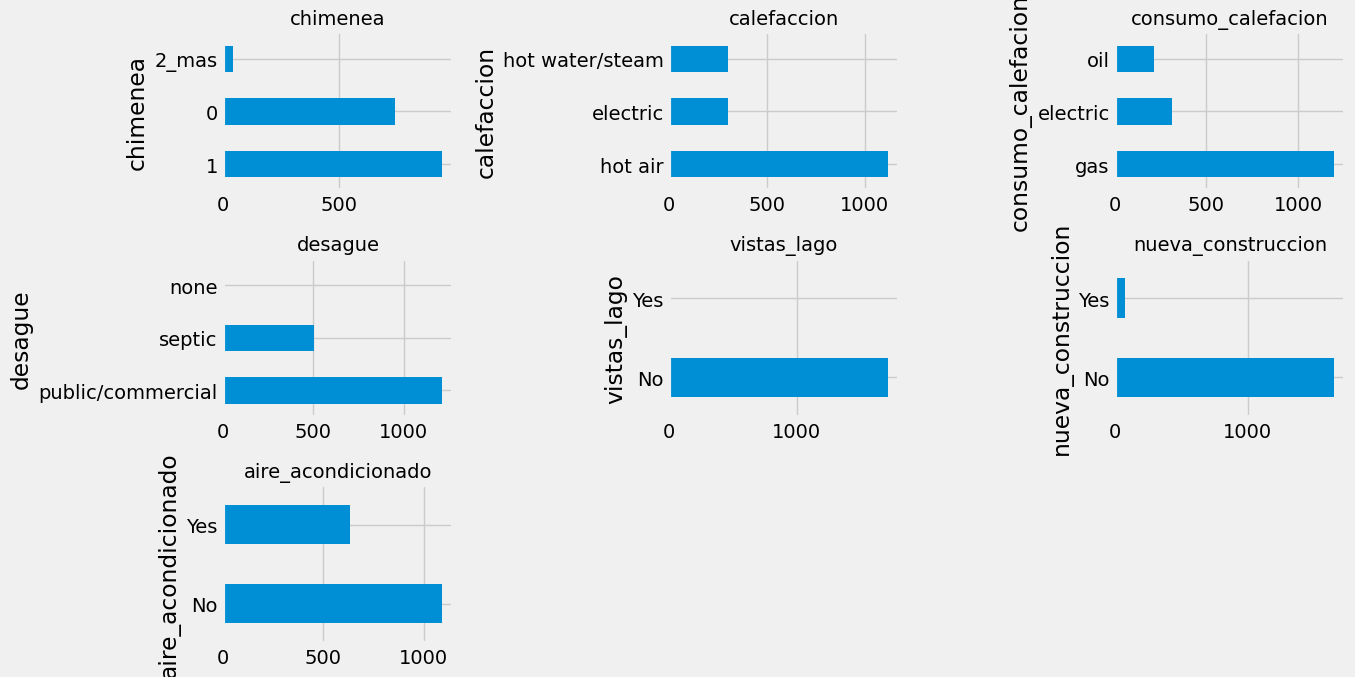

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 7))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()

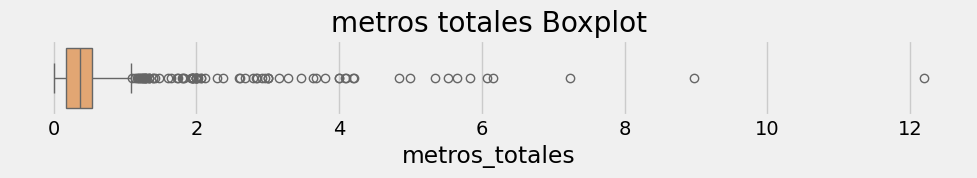


Summary Statistics for metros totales:
 count    1728.000000
mean        0.500214
std         0.698680
min         0.000000
25%         0.170000
50%         0.370000
75%         0.540000
max        12.200000
Name: metros_totales, dtype: float64


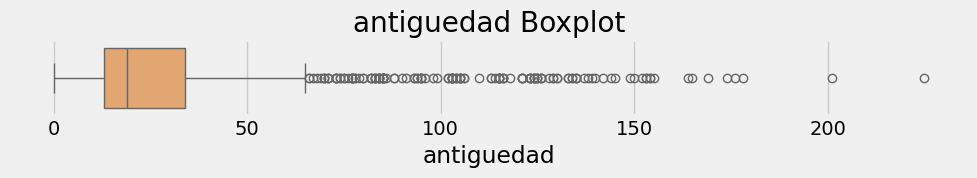


Summary Statistics for antiguedad:
 count    1728.000000
mean       27.916088
std        29.209988
min         0.000000
25%        13.000000
50%        19.000000
75%        34.000000
max       225.000000
Name: antiguedad, dtype: float64


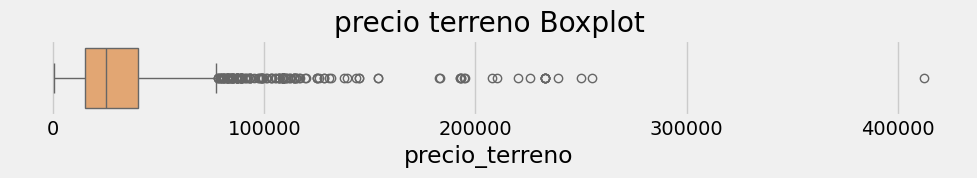


Summary Statistics for precio terreno:
 count      1728.000000
mean      34557.187500
std       35021.168056
min         200.000000
25%       15100.000000
50%       25000.000000
75%       40200.000000
max      412600.000000
Name: precio_terreno, dtype: float64


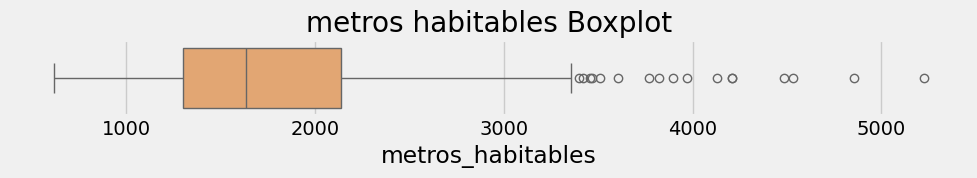


Summary Statistics for metros habitables:
 count    1728.000000
mean     1754.975694
std       619.935553
min       616.000000
25%      1300.000000
50%      1634.500000
75%      2137.750000
max      5228.000000
Name: metros_habitables, dtype: float64


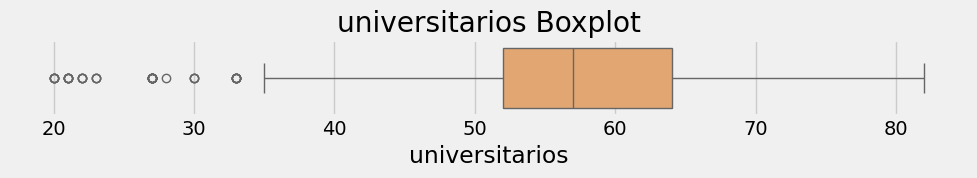


Summary Statistics for universitarios:
 count    1728.000000
mean       55.567708
std        10.333581
min        20.000000
25%        52.000000
50%        57.000000
75%        64.000000
max        82.000000
Name: universitarios, dtype: float64


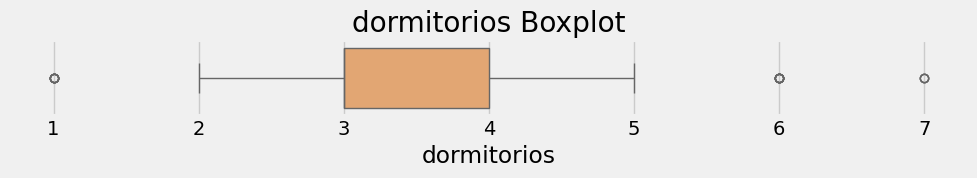


Summary Statistics for dormitorios:
 count    1728.000000
mean        3.154514
std         0.817351
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: dormitorios, dtype: float64


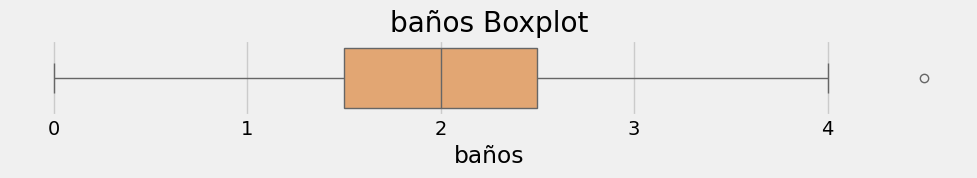


Summary Statistics for baños:
 count    1728.000000
mean        1.900174
std         0.658352
min         0.000000
25%         1.500000
50%         2.000000
75%         2.500000
max         4.500000
Name: baños, dtype: float64


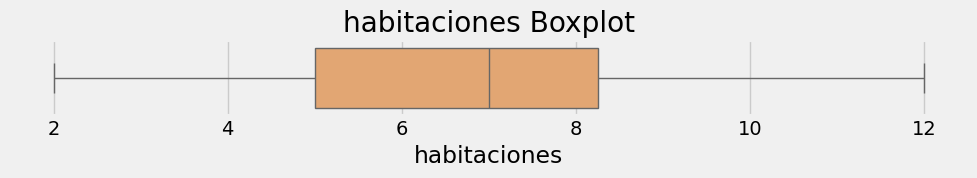


Summary Statistics for habitaciones:
 count    1728.000000
mean        7.041667
std         2.316453
min         2.000000
25%         5.000000
50%         7.000000
75%         8.250000
max        12.000000
Name: habitaciones, dtype: float64


In [ ]:
# Outliers
# ==============================================================================
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))

    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')
for column in columnas_numeric:
    univariate_analysis(datos, column, column.replace('_', ' '))

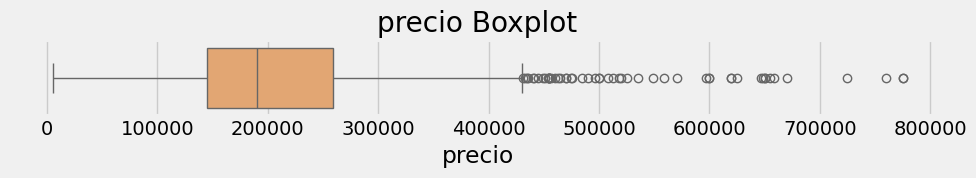


Summary Statistics for "precio":
 count      1728.000000
mean     211966.705440
std       98441.391015
min        5000.000000
25%      145000.000000
50%      189900.000000
75%      259000.000000
max      775000.000000
Name: precio, dtype: float64


In [ ]:
plt.figure(figsize=(10, 2))

sns.boxplot(x=datos['precio'], color='sandybrown')
plt.title('precio Boxplot')

plt.tight_layout()
plt.show()

print(f'\nSummary Statistics for "precio":\n', datos['precio'].describe())

In [ ]:
datos.describe()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.500000,12.000000


In [ ]:
#Eliminacion de outliers mediante metodo de Hampel
def hampel_filter(data, threshold=3):
    median = np.median(data)
    mad = np.median([np.abs(x - median) for x in data])
    limit = threshold * mad
    print(median,mad,limit)
    filtered_data = [x if np.abs(x - median) <= limit else median for x in data]

    return filtered_data


plt.figure(figsize=(10, 2))

sns.boxplot(x=hampel_filter(datos['precio']), color='sandybrown')
plt.title('precio Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
#Eliminacion de outliers mediante metodo IQR

def iqr_filter(df, factor=1.5):
    df_numeric = df.select_dtypes(include=[np.number])
    df_filtered = df.copy()

    for col in df_numeric.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - factor * iqr
        upper = q3 + factor * iqr

        # Filtramos el DataFrame directamente en cada paso
        df_filtered = df_filtered.loc[
            df_filtered[col].between(lower, upper, inclusive='both')
        ]
        print(col,lower,upper)

    return df_filtered

datos_filtrados = iqr_filter(datos)

datos_filtrados

precio -26000.0 430000.0
metros_totales -0.3849999999999999 1.095
antiguedad -18.5 65.5
precio_terreno -22550.0 77850.0
metros_habitables 43.375 3394.375
universitarios 34.0 82.0
dormitorios 1.5 5.5
baños 0.0 4.0
habitaciones 0.125 13.125


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
6,153000,0.40,33,23300,2752,51,4,1,1.5,8,hot water/steam,oil,septic,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,249000,0.43,41,45800,2426,61,4,2_mas,2.0,7,hot water/steam,gas,public/commercial,No,No,No
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No


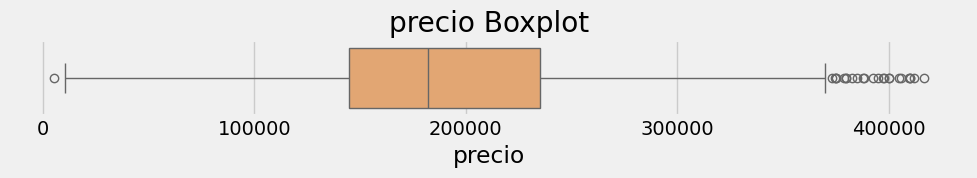


Summary Statistics for "precio":
 count      1325.000000
mean     194459.320000
std       69172.448528
min        5000.000000
25%      145000.000000
50%      182000.000000
75%      235000.000000
max      417000.000000
Name: precio, dtype: float64


In [ ]:
plt.figure(figsize=(10, 2))

sns.boxplot(x=datos_filtrados['precio'], color='sandybrown')
plt.title('precio Boxplot')

plt.tight_layout()
plt.show()

print(f'\nSummary Statistics for "precio":\n', datos_filtrados['precio'].describe())

In [4]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'),#X
                                        datos['precio'].values.reshape(-1,1),#es necesario para asegurar que la variable dependiente y esté en un formato compatible con los modelos que esperan una matriz columna
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [5]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
# columnas cualitativas. Para mantener las columnas a las que no se les aplica
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'
                                                            ,drop='first'
                                                            ))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        #('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [ ]:
X_train

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
1571,0.46,36,27400,2576,64,4,1,2.5,12,hot water/steam,gas,public/commercial,No,No,No
832,0.37,16,24500,1877,63,4,1,3.0,10,hot air,gas,public/commercial,No,No,No
1302,0.55,14,3000,1716,36,4,0,2.0,6,hot air,oil,septic,No,No,Yes
1068,0.42,32,29400,1914,63,3,1,1.5,5,hot air,gas,public/commercial,No,No,No
535,0.15,0,36000,2057,57,3,1,2.5,9,hot air,gas,public/commercial,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,0.04,19,25600,1216,62,2,1,2.0,4,hot air,gas,public/commercial,No,No,Yes
1077,0.09,18,17600,1480,63,3,0,1.5,8,electric,electric,public/commercial,No,No,Yes
1318,0.44,7,24200,1328,64,3,1,2.5,8,hot air,gas,public/commercial,No,No,No
723,0.06,15,46600,2300,57,3,1,3.0,10,hot air,gas,public/commercial,No,No,Yes


In [6]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

In [7]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [8]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names_out(cat_cols)
labels = np.concatenate([encoded_cat,numeric_cols])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.head()

,chimenea_1,chimenea_2_mas,calefaccion_hot air,calefaccion_hot water/steam,consumo_calefacion_gas,consumo_calefacion_oil,desague_public/commercial,desague_septic,vistas_lago_Yes,nueva_construccion_Yes,aire_acondicionado_Yes,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.46,36.0,27400.0,2576.0,64.0,4.0,2.5,12.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.37,16.0,24500.0,1877.0,63.0,4.0,3.0,10.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.55,14.0,3000.0,1716.0,36.0,4.0,2.0,6.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.42,32.0,29400.0,1914.0,63.0,3.0,1.5,5.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.15,0.0,36000.0,2057.0,57.0,3.0,2.5,9.0


In [9]:
pd.Series(y_train.reshape(-1))

,0
0,315000
1,225000
2,209000
3,205000
4,188095
...,...
1377,203000
1378,143000
1379,229900
1380,374900


In [10]:
# Matriz de correlacion
# ==============================================================================
corr_matrix = pd.concat([datos_train_prep, y_train
                         ], axis=1).corr()
corr_matrix

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from scipy import stats
# Ajuste del modelo utilizando matrices X, y (similar a scikit-learn)
datos_train_prep = sm.add_constant(datos_train_prep, prepend=True).rename(columns={'const':'Intercept'})
modelo  = sm.OLS(endog=y_train, exog=datos_train_prep)
modelo_res = modelo.fit()
print(modelo_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     142.2
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          1.78e-306
Time:                        23:53:03   Log-Likelihood:                -17072.
No. Observations:                1382   AIC:                         3.418e+04
Df Residuals:                    1362   BIC:                         3.429e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [12]:
# Cálculo del VIF
# ==============================================================================
#datos_train_prep = datos_train_prep.drop('Intercept', axis=1)
vif = pd.DataFrame()
vif["variables"] = datos_train_prep.columns
vif["VIF"] = [variance_inflation_factor(datos_train_prep.values, i) for i in range(datos_train_prep.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
0,Intercept,194.518486
7,desague_public/commercial,29.915084
8,desague_septic,29.792023
3,calefaccion_hot air,18.226818
5,consumo_calefacion_gas,16.633444
4,calefaccion_hot water/steam,12.348996
6,consumo_calefacion_oil,9.759498
15,metros_habitables,4.167782
19,habitaciones,2.520779
18,baños,2.478547


In [ ]:
predictores = ['aire_acondicionado_Yes',
        'metros_totales','nueva_construccion_Yes','habitaciones','precio_terreno','baños']#, 'metros_habitables']#,  #
datos_train_prep.columns
modelo_reduc = datos_train_prep[predictores]
modelo_reduc = sm.add_constant(modelo_reduc, prepend=True).rename(columns={'const':'Intercept'})
modelo_res  = sm.OLS(endog=y_train, exog=modelo_reduc).fit()
print(modelo_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     342.3
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          1.24e-268
Time:                        00:03:01   Log-Likelihood:                -17196.
No. Observations:                1382   AIC:                         3.441e+04
Df Residuals:                    1375   BIC:                         3.444e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1584

In [ ]:
vif = pd.DataFrame()
vif["variables"] = modelo_reduc.columns
vif["VIF"] = [variance_inflation_factor(modelo_reduc.values, i) for i in range(modelo_reduc.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
0,Intercept,13.185644
6,baños,1.585166
4,habitaciones,1.429756
1,aire_acondicionado_Yes,1.182300
5,precio_terreno,1.181415
3,nueva_construccion_Yes,1.099551
2,metros_totales,1.025718


In [ ]:
#Regresion de antiguedad vs las demas
demas = datos_train_prep.drop(columns='antiguedad')
antiguedad = datos_train_prep['antiguedad']
demas = sm.add_constant(demas, prepend=True).rename(columns={'const':'Intercept'})
modelo_ant  = sm.OLS(endog=antiguedad, exog=demas).fit()
print(modelo_ant.summary())

                            OLS Regression Results                            
Dep. Variable:             antiguedad   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     35.66
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          8.59e-101
Time:                        00:01:02   Log-Likelihood:                -6309.4
No. Observations:                1382   AIC:                         1.266e+04
Df Residuals:                    1363   BIC:                         1.276e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia adelante (forward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo añadiendo variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    metrica: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


def backward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia atrás (backward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo eliminando variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    metrica: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    # Se inicia con todas las variables como predictores
    seleccion = X.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=X[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break

        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)

In [ ]:
# Selección de variables hacia forward
# ==============================================================================
predictores = forward_selection(
    X            = datos_train_prep,
    y            = y_train,
    criterio     = 'aic',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['metros_habitables'] | aic: 34690.128
variables: ['metros_habitables', 'precio_terreno'] | aic: 34379.441
variables: ['metros_habitables', 'precio_terreno', 'baños'] | aic: 34290.336
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes'] | aic: 34243.871
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes'] | aic: 34218.347
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes', 'calefaccion_hot air'] | aic: 34198.691
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes', 'calefaccion_hot air', 'antiguedad'] | aic: 34189.317
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes', 'calefaccion_hot air', 'antiguedad', 'metros_totales'] | aic: 34183.296
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes', '

['aire_acondicionado_Yes',
 'antiguedad',
 'baños',
 'calefaccion_hot air',
 'desague_septic',
 'dormitorios',
 'habitaciones',
 'metros_habitables',
 'metros_totales',
 'nueva_construccion_Yes',
 'precio_terreno',
 'vistas_lago_Yes']

In [ ]:
# Selección de variables hacia forward
# ==============================================================================
predictores = forward_selection(
    X            = datos_train_prep,
    y            = y_train,
    criterio     = 'rsquared_adj',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['metros_habitables'] | rsquared_adj: 0.914
variables: ['metros_habitables', 'precio_terreno'] | rsquared_adj: 0.931
variables: ['metros_habitables', 'precio_terreno', 'baños'] | rsquared_adj: 0.936
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes'] | rsquared_adj: 0.938
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes'] | rsquared_adj: 0.939
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes', 'calefaccion_hot air'] | rsquared_adj: 0.940
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes', 'calefaccion_hot air', 'antiguedad'] | rsquared_adj: 0.940
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vistas_lago_Yes', 'nueva_construccion_Yes', 'calefaccion_hot air', 'antiguedad', 'metros_totales'] | rsquared_adj: 0.941
variables: ['metros_habitables', 'precio_terreno', 'baños', 'vista

['aire_acondicionado_Yes',
 'antiguedad',
 'baños',
 'calefaccion_hot air',
 'chimenea_1',
 'consumo_calefacion_oil',
 'desague_septic',
 'dormitorios',
 'habitaciones',
 'metros_habitables',
 'metros_totales',
 'nueva_construccion_Yes',
 'precio_terreno',
 'vistas_lago_Yes']

In [ ]:
#modelo final
datos_train_prep = sm.add_constant(datos_train_prep, prepend=True).rename(columns={'const':'Intercept'})
modelo_final  = sm.OLS(endog=y_train, exog=datos_train_prep[['Intercept',
                                                            'aire_acondicionado_Yes',
                                                            #'antiguedad',
                                                            'baños',
                                                            #'calefaccion_hot water/steam',
                                                            #'chimenea_2_mas',
                                                            #'consumo_calefacion_gas',
                                                            #'consumo_calefacion_oil',
                                                            #'desague_public/commercial',
                                                            #'desague_septic',
                                                            #'dormitorios',
                                                            'habitaciones',
                                                            'metros_habitables',
                                                            'metros_totales',
                                                            'nueva_construccion_Yes',
                                                            'precio_terreno',
                                                            'vistas_lago_Yes']])
modelo_final_res = modelo_final.fit()
print(modelo_final_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     326.5
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          3.00e-311
Time:                        00:17:41   Log-Likelihood:                -17091.
No. Observations:                1382   AIC:                         3.420e+04
Df Residuals:                    1373   BIC:                         3.425e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3767

In [13]:
# Selección de predictores con sklearn SequentialFeatureSelector
# ==============================================================================
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
sfs = SequentialFeatureSelector(
    LR,
    n_features_to_select = 'auto',
    direction            = 'forward',
    scoring              = 'r2',
    cv                   = 4
)
sfs.fit(datos_train_prep, y_train)
lista_final = sfs.get_feature_names_out().tolist()
lista_final

['calefaccion_hot air',
 'vistas_lago_Yes',
 'nueva_construccion_Yes',
 'aire_acondicionado_Yes',
 'metros_totales',
 'precio_terreno',
 'metros_habitables',
 'dormitorios',
 'baños',
 'habitaciones']

In [14]:
modelo_final  = sm.OLS(endog=y_train, exog=datos_train_prep[['Intercept']+lista_final])
modelo_final_res = modelo_final.fit()
print(modelo_final_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     268.7
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          1.70e-314
Time:                        23:54:37   Log-Likelihood:                -17077.
No. Observations:                1382   AIC:                         3.418e+04
Df Residuals:                    1371   BIC:                         3.423e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                185

## Analisis de residuos

In [23]:
#Residuos del modelo
# ==============================================================================
residuos = modelo_final_res.resid

#predicciones de entrenamiento
# ==============================================================================
prediccion_train = modelo_final_res.predict(datos_train_prep[['Intercept']+lista_final])

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


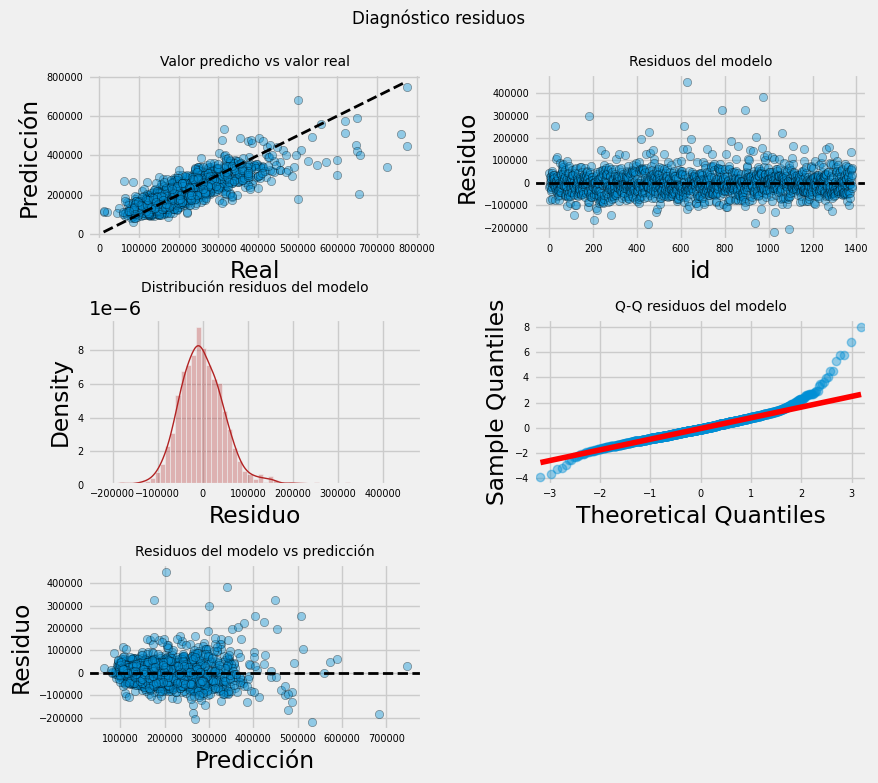

In [16]:
#Graficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data     = residuos,
    stat     = "density",
    kde      = True,
    line_kws = {'linewidth': 1},
    color    = "firebrick",
    alpha    = 0.3,
    ax       = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12);

## Valor predicho vs el real:
Podemos apreciar los errores en la prediccion
## Residuos del modelo:
Vemos como se distribuyen los errores a medida que aumenta la muestra, idealmente no deberian incremetar proporcional o exponencialmente.
## Distribucion de los residuos:
Buscamos que se distribuyan normalmente
##Analisis cuantilico de residuos del modelo:
Comparas cómo debería comportarse la distribución de los residuos (idealmente normal, simétrica, sin sesgo) contra cómo realmente se comportan tus residuos.
## Residuos vs prediccion
Vemos como aumenta el error a medida que aumenta el valor de la variable predicha

### Test de normalidad de Shapiro-Wilk

H0 = los errores siguen una distribución normal.

H1 = los errores NO siguen una distribución normal.

Valor-p = la probabilidad de aceptar la H0

Se rechaza normalidad con p<0.05

Se acepta normalidad con p>0.05

In [25]:
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")
print("Se rechaza la hipótesis nula de normalidad si p-value < 0.05")
print("Por lo tanto, nuestros residuos no son normales")


Test Shapiro-Wilk: estadístico = 0.9231532568278799, p-value = 5.626599985468798e-26
Se rechaza la hipótesis nula de normalidad si p-value < 0.05
Por lo tanto, nuestros residuos no son normales


In [24]:
# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuos)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")

Test D'Agostino's K-squared: estadístico = 466.94241969164227, p-value = 4.024777539169397e-102


In [26]:
# Prueba de Breusch-Pagan
# ==============================================================================
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, datos_train_prep[['Intercept',
                                                            'metros_totales',
                                                            'precio_terreno',
                                                            'metros_habitables',
                                                            'dormitorios',
                                                            'baños',
                                                            'habitaciones',
                                                            'calefaccion_hot air',
                                                            'vistas_lago_Yes',
                                                            'nueva_construccion_Yes',
                                                            'aire_acondicionado_Yes']])
print(f"Estadístico= {fvalue}, p-value = {f_p_value}")

Estadístico= 9.939514561477296, p-value = 3.080231237720543e-16


## Conclusion del analisis de los residuos:
Aunque a partir del analisis grafico de los residuos podriamos concluir que los errores se distribuyen normalmente, los estadisticos de shapiro y D'Agostino's K-squared test, etc. indican que los datos no siguen una distribucion normal con casi total certeza

## Prueba con precio filtrado sin outliers

In [27]:
datos_filtrados = datos.copy()
datos_filtrados = datos_filtrados[datos_filtrados['precio'] < 450000]
datos_filtrados['precio'].describe()

,precio
count,1683.000000
mean,202776.023173
std,80392.017248
min,5000.000000
25%,144500.000000
50%,187000.000000
75%,250000.000000
max,449000.000000


In [28]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos_filtrados.drop('precio', axis = 'columns'),#X
                                        datos_filtrados['precio'].values.reshape(-1,1),#Y
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [37]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [30]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names_out(cat_cols)
labels = np.concatenate([encoded_cat,numeric_cols])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.head()

,chimenea_1,chimenea_2_mas,calefaccion_hot air,calefaccion_hot water/steam,consumo_calefacion_gas,consumo_calefacion_oil,desague_public/commercial,desague_septic,vistas_lago_Yes,nueva_construccion_Yes,aire_acondicionado_Yes,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.56,29.0,34800.0,1136.0,64.0,3.0,1.0,6.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.46,32.0,11500.0,1666.0,57.0,4.0,2.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.15,17.0,15600.0,908.0,54.0,2.0,1.0,5.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.28,18.0,6300.0,1527.0,52.0,4.0,2.0,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.14,20.0,18400.0,1480.0,64.0,3.0,1.5,8.0


In [40]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names_out(cat_cols)
labels = np.concatenate([encoded_cat,numeric_cols])
datos_test_prep = preprocessor.transform(X_test)
datos_test_prep = pd.DataFrame(datos_test_prep, columns=labels)
datos_test_prep

,chimenea_1,chimenea_2_mas,calefaccion_hot air,calefaccion_hot water/steam,consumo_calefacion_gas,consumo_calefacion_oil,desague_public/commercial,desague_septic,vistas_lago_Yes,nueva_construccion_Yes,aire_acondicionado_Yes,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.69,26.0,27900.0,1666.0,64.0,3.0,1.5,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.34,9.0,30000.0,1423.0,40.0,3.0,1.5,8.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.09,18.0,17600.0,1480.0,64.0,3.0,1.5,7.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.21,62.0,107000.0,1579.0,57.0,3.0,2.0,4.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.14,9.0,300.0,1300.0,41.0,3.0,1.5,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.55,0.0,4400.0,2000.0,52.0,4.0,2.5,7.0
333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.17,139.0,1900.0,1410.0,38.0,6.0,1.5,9.0
334,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.40,25.0,27000.0,2243.0,40.0,3.0,2.5,6.0
335,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.46,11.0,27400.0,2212.0,63.0,4.0,2.5,10.0


In [31]:
datos_train_prep = sm.add_constant(datos_train_prep, prepend=True).rename(columns={'const':'Intercept'})
modelo  = sm.OLS(endog=y_train, exog=datos_train_prep[['Intercept',
                                                            'metros_totales',
                                                            'precio_terreno',
                                                            'metros_habitables',
                                                            #'dormitorios',
                                                            'baños',
                                                            'habitaciones',
                                                            'calefaccion_hot air',
                                                            'vistas_lago_Yes',
                                                            'nueva_construccion_Yes',
                                                            'aire_acondicionado_Yes']])
modelo_res = modelo.fit()
print(modelo_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     258.8
Date:                Tue, 29 Apr 2025   Prob (F-statistic):          2.23e-285
Time:                        00:43:54   Log-Likelihood:                -16428.
No. Observations:                1346   AIC:                         3.288e+04
Df Residuals:                    1336   BIC:                         3.293e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9584

In [32]:
# Residuos del modelo
# ==============================================================================
residuos = modelo_res.resid

# prediciones de entrenamiento
# ==============================================================================
prediccion_train = modelo_res.predict(datos_train_prep[['Intercept',
                                                            'metros_totales',
                                                            'precio_terreno',
                                                            'metros_habitables',
                                                            #'dormitorios',
                                                            'baños',
                                                            'habitaciones',
                                                            'calefaccion_hot air',
                                                            'vistas_lago_Yes',
                                                            'nueva_construccion_Yes',
                                                            'aire_acondicionado_Yes']])

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


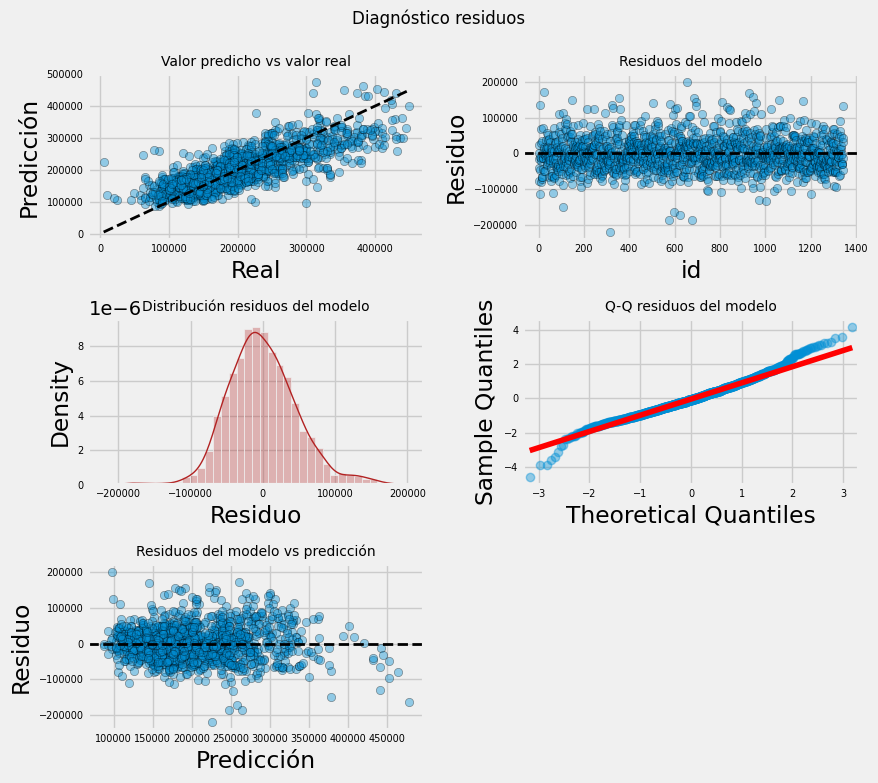

In [33]:
#Graficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data     = residuos,
    stat     = "density",
    kde      = True,
    line_kws = {'linewidth': 1},
    color    = "firebrick",
    alpha    = 0.3,
    ax       = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12);

In [35]:
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")
# Normalidad de los residuos D'Agostino's K-squared test
k2, p_value = stats.normaltest(residuos)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")

# Prueba de Breusch-Pagan
# ==============================================================================
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, datos_train_prep[['Intercept',
                                                            'metros_totales',
                                                            'precio_terreno',
                                                            'metros_habitables',
                                                            #'dormitorios',
                                                            'baños',
                                                            'habitaciones',
                                                            'calefaccion_hot air',
                                                            'vistas_lago_Yes',
                                                            'nueva_construccion_Yes',
                                                            'aire_acondicionado_Yes']])
print(f"Estadístico= {fvalue}, p-value = {f_p_value}")

Test Shapiro-Wilk: estadístico = 0.9826453628719758, p-value = 1.2345187724117873e-11
Test D'Agostino's K-squared: estadístico = 59.88816424293756, p-value = 9.895787687137078e-14
Estadístico= 7.528113031543298, p-value = 8.188236076971082e-11


In [43]:
# Prediciones del conjunto de test con intervalo de confianza
# ==============================================================================
datos_test_prep = sm.add_constant(datos_test_prep, prepend=True).rename(columns={'const':'intercept'})
modelo_res.predict(datos_test_prep[['intercept',
                                    'metros_totales',
                                    'precio_terreno',
                                    'metros_habitables',
                                    #'dormitorios',
                                    'baños',
                                    'habitaciones',
                                    'calefaccion_hot air',
                                    'vistas_lago_Yes',
                                    'nueva_construccion_Yes',
                                    'aire_acondicionado_Yes']])

predicciones = modelo_res.get_prediction(exog = datos_test_prep[['intercept',
                                                            'metros_totales',
                                                            'precio_terreno',
                                                            'metros_habitables',
                                                            #'dormitorios',
                                                            'baños',
                                                            'habitaciones',
                                                            'calefaccion_hot air',
                                                            'vistas_lago_Yes',
                                                            'nueva_construccion_Yes',
                                                            'aire_acondicionado_Yes']]).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,194607.278883,3615.803254,187514.008599,201700.549167,99182.055728,290032.502039
1,178430.714181,4043.591722,170498.233628,186363.194735,82939.442441,273921.985922
2,175357.471378,2941.442202,169587.122967,181127.819788,80021.456925,270693.485830
3,252505.856387,4688.429078,243308.371811,261703.340962,156901.188857,348110.523917
4,141115.528150,3131.377881,134972.575088,147258.481213,45756.235980,236474.820321
...,...,...,...,...,...,...
332,193520.710779,7088.508693,179614.891095,207426.530463,97348.830523,289692.591035
333,144453.837253,3566.616001,137457.059632,151450.614875,49035.738194,239871.936312
334,252015.187462,3273.255055,245593.908100,258436.466825,156637.561367,347392.813558
335,256907.253326,3011.955178,250998.576702,262815.929949,161562.766383,352251.740268


In [44]:
# Error de test del modelo
# ==============================================================================
error = rmse(y_test.flatten(),
             predicciones['mean'],
             )
print(f"El error (rmse) de test es: {error}") #El margen de error

El error (rmse) de test es: 48983.7364213587
